In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df=pd.read_csv('shark.csv', encoding='latin1')

#Observation et mise en forme des données 

In [3]:
df1=df[['Year','Activity','Country','Injury' ,'Fatal (Y/N)']]

In [4]:
df1=df1.rename(columns={'Fatal (Y/N)':'Fatal'})
df1.columns

Index(['Year', 'Activity', 'Country', 'Injury', 'Fatal'], dtype='object')

In [5]:
df1['Country'] = df1['Country'].str.replace(r'\W|[0-9]', ' ')
df1['Injury'] = df1['Injury'].str.replace(r'\W|[0-9]', ' ')
df1['Fatal'] = df1['Fatal'].str.replace(r'\W|[0-9]', ' ')
df1['Activity'] = df1['Activity'].str.replace(r'\W|[0-9]', ' ')
df1['Activity'] = df1['Activity'].str.strip().str.upper()
df1['Country'] = df1['Country'].str.strip().str.upper()
df1['Injury'] = df1['Injury'].str.strip().str.upper()
df1['Fatal'] = df1['Fatal'].str.strip().str.upper()

In [6]:
# df1['Activity'].fillna("NOFILLING", inplace = True)

In [7]:
# df1['Country'].fillna("NO INFO", inplace = True)

In [8]:
df1['Injury']=[re.findall(r'FATAL',str(x)) for x in df1['Injury']]

In [9]:
df1['Activity']=[re.findall(r'\w*ING',str(x)) for x in df1['Activity']]

#Remplissage des valeurs manquantes

In [10]:
#La colonne Activité à des valeurs sous forme de liste
#Les NaN sont maintenant sous forme de liste vide 

In [11]:
df1['Fatal']= df1['Fatal'].fillna('UNKNOWN')
df1['Country']= df1['Country'].fillna('OTHER')

In [12]:
# l=[]
# for i in result.Activity:
#     if len(i)>0:
#         l.append(i[0])
#     else:
#         l.append(np.nan)
# result.Activity=l
# result

#Vérification de la variance

In [13]:
# low_variance=[]
# for col in df1._get_numeric_data():
#     minimum= min(df1[col])
#     ninety_perc =  percentile(df1[col], 90)
#     if minimum == ninety_perc:
#         low_variance.append(col)

In [14]:
# df1[col].value_counts()
#On constate que les dates très anciennes ont moins d'informations
#Je ne vais rien supprimer 

In [15]:
#Vérification des outliers
df1.boxplot(column='Year')

In [16]:
#Les outliers sont nombreux sur l'an 0 - du à un mauvais remplissage
#7 et 500 de même de plus il n'y a pas de description 
######### drop sous 1800 

In [17]:
#Observation supplémentaire
stats=df1.describe().T

In [18]:
#Ajout de la colonne IQR (Interquartile range)
stats['IQR']= stats['75%']- stats['25%']
stats


,count,mean,std,min,25%,50%,75%,max,IQR
Year,5992.0,1925.204606,286.473712,0.0,1942.0,1975.0,2003.0,2016.0,61.0


In [19]:
outliers = pd.DataFrame(columns=df1.columns)
outliers

,Year,Activity,Country,Injury,Fatal


In [20]:
# for columns in stats.index: 
#     iqr=stats.at[col,'IQR']
#     cutoff=iqr*1.6
#     lower= stats.at[col,'25%']-cutoff
#     higher= stats.at[col,'75%']+cutoff
#     results=df1[(df1[col]<lower)|(df1[col]>higher)].copy()
#     results['Outlier']=col
#     outliers=outliers.append(results)

In [21]:
# outliers.head(5)

In [22]:
# df1.drop(outliers.index)

In [23]:
from scipy.stats.mstats import winsorize

In [24]:
df2 = df1.copy()

In [25]:
df2.Year = winsorize(df2.Year, limits = [0.05, 0.95])

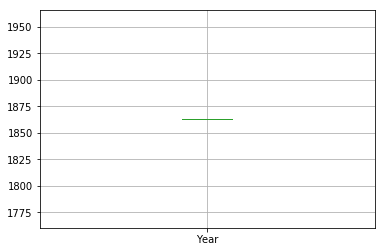

In [26]:
df2.boxplot(column='Year')

#Convertir le texte en dummies

In [27]:
#D'abord un group by sur l'année 
df1.groupby(['Year'])['Country'].agg(['describe', 'count', list])

count describe                                        \
     Country    count unique                       top freq   
Year                                                          
0        124      124     49                       USA   17   
5          1        1      1                 AUSTRALIA    1   
77         1        1      1                     OTHER    1   
500        1        1      1                    MEXICO    1   
1543       1        1      1                 VENEZUELA    1   
1554       1        1      1                    FRANCE    1   
1555       1        1      1                     OTHER    1   
1580       1        1      1  BETWEEN PORTUGAL   INDIA    1   
1595       1        1      1                     INDIA    1   
1617       1        1      1                     INDIA    1   
1637       1        1      1                     INDIA    1   
1638       1        1      1                     OTHER    1   
1642       2        2      2                    GUINEA    1   
1700       3        3      2                    FRANCE    2   
1703       1        1      1                  BARBADOS    1   
1721       1        1      1                     ITALY    1   
1733       1        1      1                   ICELAND    1   
1738       1        1      1                     ITALY    1   
1742       1        1      1                     OTHER    1   
1748       1        1      1                    PANAMA    1   
1749       1        1      1                      CUBA    1   
1755       1        1      1                    SWEDEN    1   
1758       1        1      1         MEDITERRANEAN SEA    1   
1764       1        1      1                     SPAIN    1   
1767       1        1      1                    FRANCE    1   
1771       1        1      1                       USA    1   
1776       2        2      2                    GUINEA    1   
1779       1        1      1                       USA    1   
1785       1        1      1                   ENGLAND    1   
1787       1        1      1                 ST HELENA    1   
...      ...      ...    ...                       ...  ...   
1987      35       35     10                       USA   15   
1988      55       55     11                       USA   26   
1989      53       53      8                       USA   25   
1990      38       38      6                       USA   20   
1991      38       38      8                       USA   22   
1992      56       56     12                       USA   24   
1993      56       56     16                       USA   22   
1994      56       56     11                       USA   24   
1995      76       76     13                       USA   49   
1996      61       61     14                       USA   27   
1997      57       57     10                       USA   28   
1998      65       65     11                       USA   26   
1999      65       65     11                       USA   35   
2000      97       97     14                       USA   52   
2001      92       92     16                       USA   58   
2002      88       88     15                       USA   49   
2003      92       92     14                       USA   57   
2004      92       92     17                       USA   35   
2005     103      103     22                       USA   52   
2006     103      103     16                       USA   54   
2007     112      112     21                       USA   66   
2008     121      121     20                       USA   60   
2009     120      120     25                       USA   41   
2010     101      101     22                       USA   40   
2011     128      128     28                       USA   48   
2012     117      117     20                       USA   64   
2013     122      122     23                       USA   60   
2014     125      125     19                       USA   65   
2015     139      139     19                       USA   72   
2016     103      103     20          

In [28]:
# df8=df1.groupby(['Activity'])['Year','Country'].agg('count')
# df8

In [29]:
#dummies nous sert de support pour les models par la suite
pd.get_dummies(df1['Activity'].apply(pd.Series).stack()).sum(level=0)

,ABANDONING,ANGLING,ASCENDING,ATTACHING,ATTEMPTING,AWAITING,BAILING,BASKING,BATHING,BEING,...,WASHING,WATCHING,WEARING,WHALING,WHITING,WINDSURFING,WING,WORKING,WRANGLING,YACHTING
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df3= df1.drop(columns=['Injury','Activity'])
df6=df1.drop(columns=['Injury'])

In [31]:
df4=pd.concat([df3,pd.get_dummies((df1['Activity'].apply(pd.Series).stack()).sum(level=0), drop_first=True)], axis=1)
df4

,Year,Country,Fatal,ABANDONINGBURNINGRAGING,ANGLING,ASCENDING,ATTACHING,ATTEMPTING,ATTEMPTINGDING,ATTEMPTINGDROWNING,...,WATCHING,WATCHINGFEEDING,WEARING,WEARINGUSING,WINDSURFING,WINDSURFINGSITTING,WINDSURFINGURINATING,WORKING,WRANGLING,YACHTING
0,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,AUSTRALIA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,AUSTRALIA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016,AUSTRALIA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016,NEW CALEDONIA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016,USA,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# #supprimer les colonnes
# before=df1.shape
# select_columns = ['Year', 'Activity', 'Country', 'Fatal', 'Injury']
# data = df1[select_columns].drop_duplicates()
# after = len(data)
# print('Number of duplicate records dropped: ', str(before[0] - after))

In [33]:
# before[0]-after[0]

# pipeline

In [34]:
year = 2005

In [35]:
df6[df6.Year == year]

,Year,Activity,Country,Fatal
1291,2005,[SURFING],USA,N
1292,2005,[SWIMMING],USA,N
1293,2005,"[COMPETING, ROWING]",ATLANTIC OCEAN,N
1294,2005,[SPEARFISHING],AUSTRALIA,N
1295,2005,[FISHING],AUSTRALIA,N
1296,2005,[SURFING],USA,N
1297,2005,[SURFING],USA,N
1298,2005,[FISHING],AUSTRALIA,N
1299,2005,[SURFING],AUSTRALIA,N
1300,2005,[SURFING],SOUTH AFRICA,N


In [36]:
filetered = df6[df6.Year == year].copy()

In [37]:
result = filetered.groupby('Year', as_index=False).head(10)
#as_index permet de garder la colonne Make
# by= 'Combined MPG', specifie se qu'on sort 
result

,Year,Activity,Country,Fatal
1291,2005,[SURFING],USA,N
1292,2005,[SWIMMING],USA,N
1293,2005,"[COMPETING, ROWING]",ATLANTIC OCEAN,N
1294,2005,[SPEARFISHING],AUSTRALIA,N
1295,2005,[FISHING],AUSTRALIA,N
1296,2005,[SURFING],USA,N
1297,2005,[SURFING],USA,N
1298,2005,[FISHING],AUSTRALIA,N
1299,2005,[SURFING],AUSTRALIA,N
1300,2005,[SURFING],SOUTH AFRICA,N


In [38]:
l=[]
for i in result.Activity:
    if len(i)>0:
        l.append(i[0])
    else:
        l.append(np.nan)
result.Activity=l
result

C:\Users\leila\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Year,Activity,Country,Fatal
1291,2005,SURFING,USA,N
1292,2005,SWIMMING,USA,N
1293,2005,COMPETING,ATLANTIC OCEAN,N
1294,2005,SPEARFISHING,AUSTRALIA,N
1295,2005,FISHING,AUSTRALIA,N
1296,2005,SURFING,USA,N
1297,2005,SURFING,USA,N
1298,2005,FISHING,AUSTRALIA,N
1299,2005,SURFING,AUSTRALIA,N
1300,2005,SURFING,SOUTH AFRICA,N


In [39]:
df10 = result.groupby(['Country','Activity' ])['Country'].agg('count')
df10

Country         Activity    
ATLANTIC OCEAN  COMPETING       1
AUSTRALIA       FISHING         2
                SPEARFISHING    1
                SURFING         1
SOUTH AFRICA    SURFING         1
USA             SURFING         3
                SWIMMING        1
Name: Country, dtype: int64

In [40]:
# df10['Country'].value_counts().plot(kind='bar')
# plt.xlabel("Year", labelpad=14)
# plt.ylabel("Activty", labelpad=14)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
title= 'Shark attacks'+str(year)

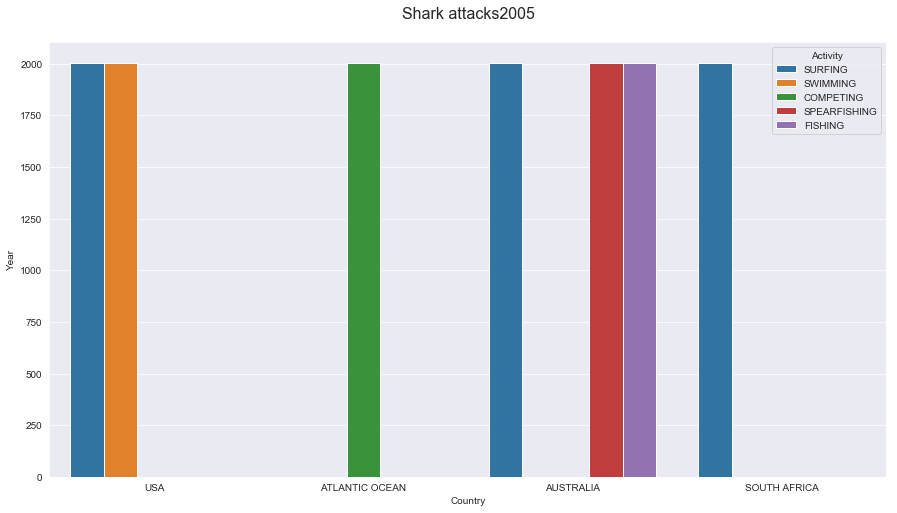

In [50]:
fig, ax= plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=result, x='Country', y='Year', hue = 'Activity')
# barchart=sns.barplot(data=result, x='Activity', y='Country')
plt.title(title+'\n',fontsize=16)
sns.set_style('darkgrid')
plt.show()
# # df6['Activity'].value_counts().plot(kind='bar')
# # plt.xlabel("Activity", labelpad=14)
# # plt.ylabel("Country", labelpad=14)# 

In [44]:
# , hue='Country'

In [45]:
# import plotly.graph_objects as go
# animals=['giraffes', 'orangutans', 'monkeys']

# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
# fig.show()